# Question 2

## 2.1 Prerequisite

umap-learn and scikit-learn-extra need to be installed.

In [1]:
pip install umap-learn

     |████████████████████████████████| 69 kB 6.7 MB/s eta 0:00:011
  Created wheel for umap-learn: filename=umap_learn-0.4.6-py3-none-any.whl size=67950 sha256=b5971254cc6519cd61d6071a31f05918c6bd2fc02d982bb74a9a66445cff201a
  Stored in directory: /home/phant4/.cache/pip/wheels/9c/18/d0/2bcf7df75d19c6ca6ff8097b12abd4c46879e9a8275e93e651
Successfully built umap-learn
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn-extra

     |████████████████████████████████| 615 kB 9.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp38-cp38-linux_x86_64.whl size=309634 sha256=8e5bbad7075ae21adc84a286881e75d063e14a6b7243a910a0416855be6a5857
  Stored in directory: /home/phant4/.cache/pip/wheels/d0/8c/9f/1ecfa0569bfea5262a1bb1ad873412e6466af3689147691a14
Successfully built scikit-learn-extra
Note: you may need to restart the kernel to use updated packages.


In [3]:
from scipy.spatial import distance
from sklearn.cluster import (KMeans,
                             SpectralClustering,
                             AgglomerativeClustering,
                             Birch)
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from texttable import Texttable

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import umap

## 2.2 Analyze data

## 2.2.1 Determine number of clusters

In [4]:
# Import the data
df = pd.DataFrame(pd.read_csv('msdata.csv'))

# Check for invalid data
print("Number of invalid data fields")
print(df.isna().sum())

df

Number of invalid data fields
id       0
class    0
f1       0
f2       0
f3       0
        ..
f4996    0
f4997    0
f4998    0
f4999    0
f5000    0
Length: 5002, dtype: int64


,id,class,f1,f2,f3,f4,f5,f6,f7,f8,...,f4991,f4992,f4993,f4994,f4995,f4996,f4997,f4998,f4999,f5000
0,1,1,14.3704,13.5189,15.2479,13.8274,14.2323,13.2383,16.1178,13.2488,...,16.0304,13.3344,16.0211,10.0160,15.2300,13.1752,14.8580,17.1991,17.1206,13.0425
1,2,1,16.6945,13.3035,16.5303,15.2523,15.7153,15.6161,18.3479,14.6787,...,17.4675,15.3745,17.5870,14.3768,16.1388,14.5012,15.3480,16.3339,19.2920,13.4911
2,3,1,16.1807,13.3308,16.1866,12.3704,13.9519,15.1695,17.2757,14.3283,...,16.1209,15.0801,18.0217,13.3382,15.7998,14.2165,15.3336,17.2670,18.9402,13.0222
3,4,1,16.8705,13.1743,16.2900,15.4931,14.8954,14.4440,16.0538,13.2912,...,16.4285,12.3385,15.8880,8.4838,14.8774,12.8094,14.7309,15.6526,17.5066,13.1212
4,5,1,16.2108,13.1175,17.1489,14.8416,15.5158,15.0314,16.7884,14.6162,...,17.5532,15.3416,17.6385,11.4521,15.9572,14.7070,15.4503,19.3039,19.0848,12.8876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,690,3,8.4976,13.3688,15.1614,14.5035,15.3060,14.6444,17.1288,14.0769,...,10.0778,12.2963,17.3011,13.3172,15.0756,11.7344,14.7675,17.0445,18.6748,7.9528
690,691,3,17.6322,13.1704,9.3617,6.8519,11.1980,15.7326,17.5944,14.0183,...,9.1258,13.3651,10.4786,12.9711,10.6035,12.6725,15.2358,15.9624,18.9266,9.0595
691,692,3,16.0000,9.4803,12.6215,7.6030,9.3341,15.4743,12.6332,13.9205,...,16.6206,13.4210,10.5399,12.8592,15.6009,11.7649,17.2696,17.0057,19.0107,7.4267
692,693,3,15.3556,13.2311,9.6935,14.4554,16.7124,15.4119,17.7624,13.9872,...,16.7045,13.1684,12.2307,6.8656,8.2650,13.8264,15.8744,16.7690,18.8164,12.5412


In [5]:
# Remove id and class for clustering
df_without_label = df.drop(["id", "class"], axis = 1)

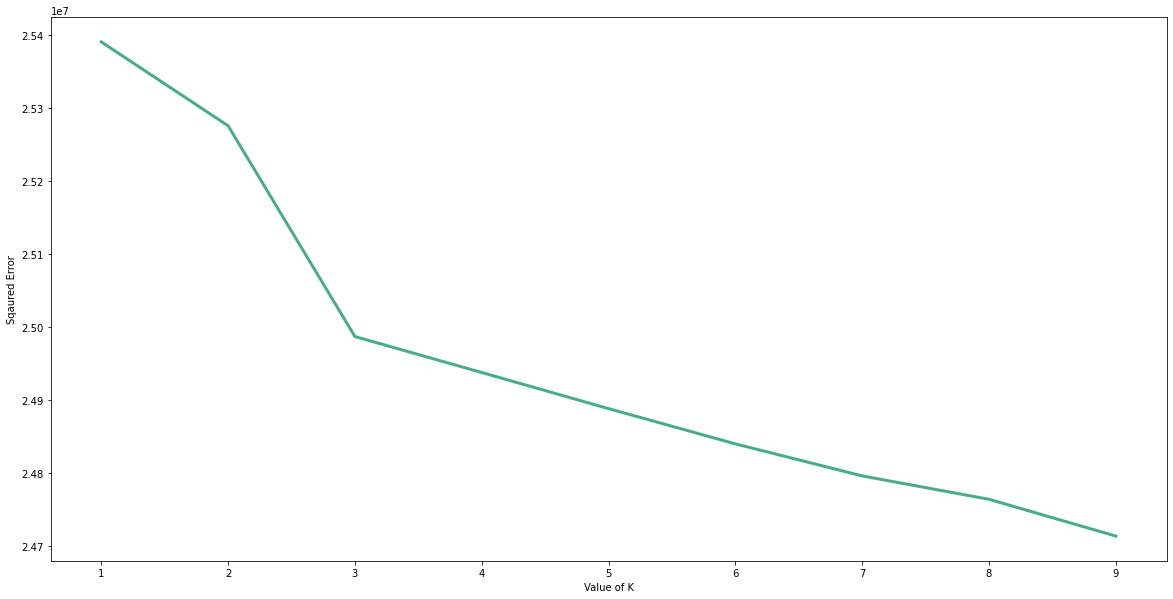

In [7]:
clusterPointError =[] 

for i in range(1, 10): 
    KM = KMeans(n_clusters = i, max_iter = 500, random_state=42) 
    KM.fit(df_without_label) 
      
    # calculates squared error for the clustered points 
    clusterPointError.append(KM.inertia_)      
    
fig,ax = plt.subplots(figsize=(20, 10))
plt.plot(range(1, 10), clusterPointError, color ='#46AE87', linewidth ='3')
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error") 
plt.savefig('Q1_Elbow.png')
plt.show() # clear the plot 

## 2.2.2 Auxiliary functions 

In [6]:
# Set color for clusters
COLORS = { 0: '#AC96D2', 1: '#46AE87', 2: '#7498C4' , 3: '#F7655E'}

def calculate_nmi_score(df, 
                        cluster_labels):
    """
    This function calculates NMI score
    arithmetic method is chosen as being instructed to compute the normalizer in the denominator
    :param df: orginal data which has class columns
    :param cluster_labels: labels generated by clustering methods
    :return: NMI score
    :rtype: float
    """
    return metrics.normalized_mutual_info_score(labels_true = df['class'].to_numpy(), 
                                                labels_pred = cluster_labels, 
                                                average_method = 'arithmetic')

def plot_cluster(x, 
                 y, 
                 labels, 
                 title):
    """
    This function plot a graph to illustrate the data in 2D.
    :param x: x coordinate
    :param y: y coordinate
    :param labels: labels of the points. Can be cluster labels or true labels
    :param title: graph title
    """
    
    c = [COLORS[l] for l in labels]
    
    fig = plt.figure(figsize = (10, 10))
    fig.suptitle(title, fontsize = 20)

    plt.scatter(x, y, c = c)
    plt.show()
    
def report_nmi_matrix_stats(score_matrix):
    """
    This function returns the highest score, the lowest score, the average score and the variance of the score.
    :param score_matrix: score matrix, which can be calculated by using generate_tsne_nmi_score_matrix or 
    generate_umap_nmi_score_matrix functions
    """
    print("Min Normalized Mutual Information", np.min(score_matrix))
    print("Max Normalized Mutual Information", np.max(score_matrix))
    print("Average Normalized Mutual Information", np.mean(score_matrix))
    print("Var Normalized Mutual Information", np.var(score_matrix))

## 1.2.3 Naive approach

In [7]:
naive_kmeans_labels = KMeans(n_clusters=3, 
                      random_state=42, 
                      init='k-means++'
                     ).fit_predict(df_without_label)

print("NMI for K-Means without configuring params")
print(calculate_nmi_score(df, naive_kmeans_labels))

naive_spectral_labels = SpectralClustering(n_clusters=3, 
                                           random_state=42,
                                           affinity = 'nearest_neighbors',
                                           n_neighbors=25
                                          ).fit_predict(df_without_label)

print("NMI for Spectral Clustering without configuring params")
print(calculate_nmi_score(df, naive_spectral_labels))

NMI for K-Means without configuring params
0.04765345188469406
NMI for Spectral Clustering without configuring params
0.0011843986321672891


## 2.3 Clustering

### 2.3.1 T-SNE Technique

In [45]:
def generate_tsne_embedding(df, 
                            perplexity_range = [i*5 for i in range(1, 11)],
                            metric='cityblock',
                            random_state = 42):
    """
    This function performs nonlinear dimensionality reduction on given high-dimensional data
    :param df: high-dimensional data
    :param perplexity_range: perplexity range which needs to be looped through
    :param metric: metric to be used for t-SNE
    :param random_state: for reproducibility
    :return: 1D embedding of data represented in 2D
    """
    embedding = []
    
    for perplexity in perplexity_range:

        fit = TSNE(method = 'exact',
                   metric = metric,
                   perplexity = perplexity,
                   random_state = random_state)
            
        embedding_perplexity = fit.fit_transform(df)
        embedding.append(embedding_perplexity)

    return embedding

def generate_tsne_nmi_score_matrix(embeddings,
                                   cluster):
    """
    This function calculates NMI score
    :param embeddings: is generated by calling function generate_tsne_embedding
    :param cluster: clustering method. For example KMeans()
    :return: scores represented in 1D
    """
    
    scores = []
    perplexity_range = range(0, len(embeddings))
    
    for perplexity in perplexity_range: 
        
        labels = cluster.fit_predict(embeddings[perplexity])
        score_perplexity = calculate_nmi_score(df, labels)
        scores.append(score_perplexity)
        
    return scores

def generate_tsne_pcolor_plot(scores,  
                              title,
                              X = [i*5 for i in range(1, 11)]):
    
    """
    This function plots pcolor figures
    :param scores: is generated by calling function generate_tsne_nmi_score_matrix
    :param title: graph title
    :param X: must be similar to perplexity_range in function generate_tsne_embedding
    """

    fig,ax = plt.subplots(figsize=(20, 10))
    fig.suptitle(title, fontsize = 20)
    plt.pcolor([scores], cmap=plt.cm.OrRd, vmin = 0.5, vmax = 1)

    ax.set_xticks(np.arange(len(X))+0.5)
    ax.set_xticklabels(X)
    
    ax.set_yticks(np.arange(1)+0.5)
    ax.set_yticklabels([""])

    plt.colorbar()
    plt.show()

### 2.3.1.1 Score matrix 

In [21]:
# This task will be time-consuming. ETC: 10 minutes. Code from section 2.3.1.2 can be run without running this.
embedding_tsne_cityblock = generate_tsne_embedding(df_without_label, metric = 'cityblock' )

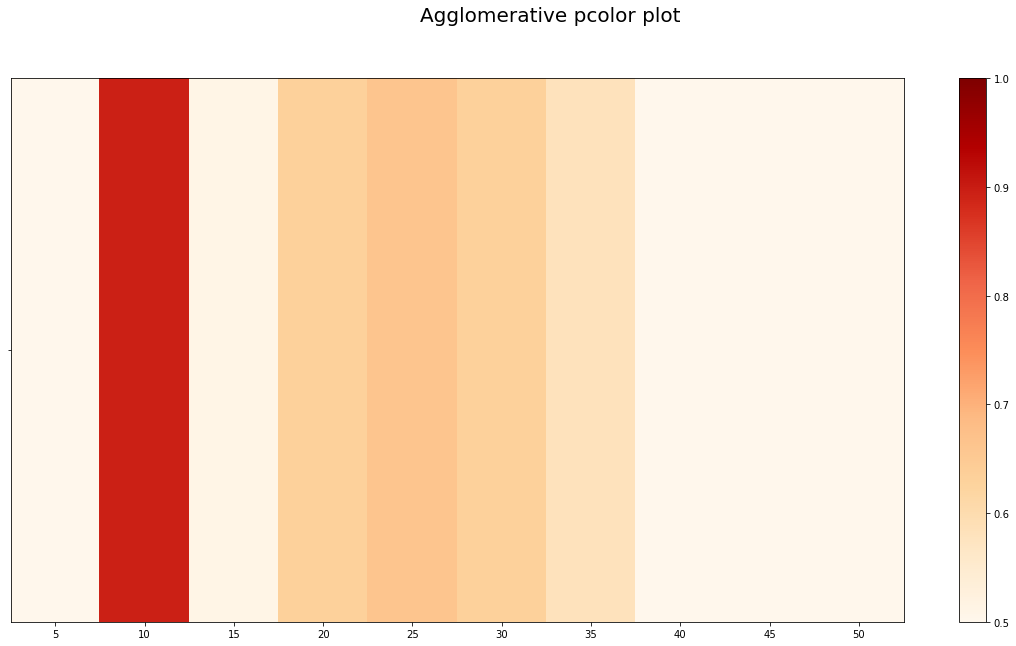

Min Normalized Mutual Information 0.3072333514368572
Max Normalized Mutual Information 0.8957683802438461
Average Normalized Mutual Information 0.5378423277608487
Var Normalized Mutual Information 0.02897806338799821


In [22]:
agglomerative_tsne_cityblock_score = generate_tsne_nmi_score_matrix(
    embeddings = embedding_tsne_cityblock,
    cluster = AgglomerativeClustering(n_clusters=3, linkage='ward'))

generate_tsne_pcolor_plot(scores = agglomerative_tsne_cityblock_score, 
                          title = "Agglomerative pcolor plot")
report_nmi_matrix_stats(agglomerative_tsne_cityblock_score)

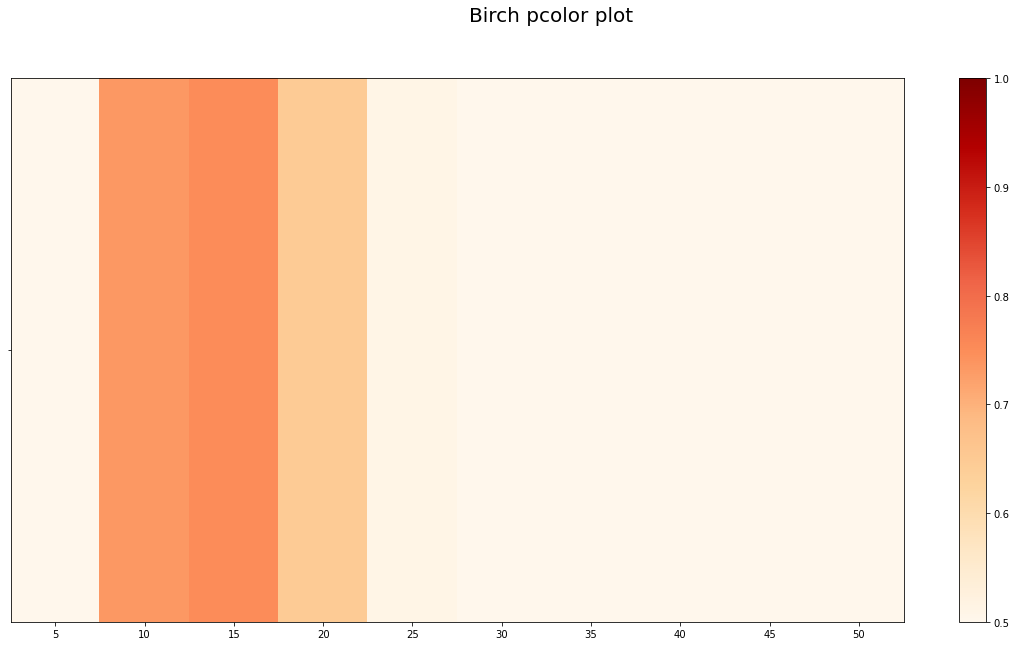

Min Normalized Mutual Information 0.25022465015746953
Max Normalized Mutual Information 0.7509153568983269
Average Normalized Mutual Information 0.46204780933125467
Var Normalized Mutual Information 0.033577040669647625


In [23]:
birch_tsne_cityblock_score = generate_tsne_nmi_score_matrix(
    embeddings = embedding_tsne_cityblock,
    cluster = Birch(n_clusters=3, threshold=0.1))

generate_tsne_pcolor_plot(scores = birch_tsne_cityblock_score, 
                          title = "Birch pcolor plot")
report_nmi_matrix_stats(birch_tsne_cityblock_score)

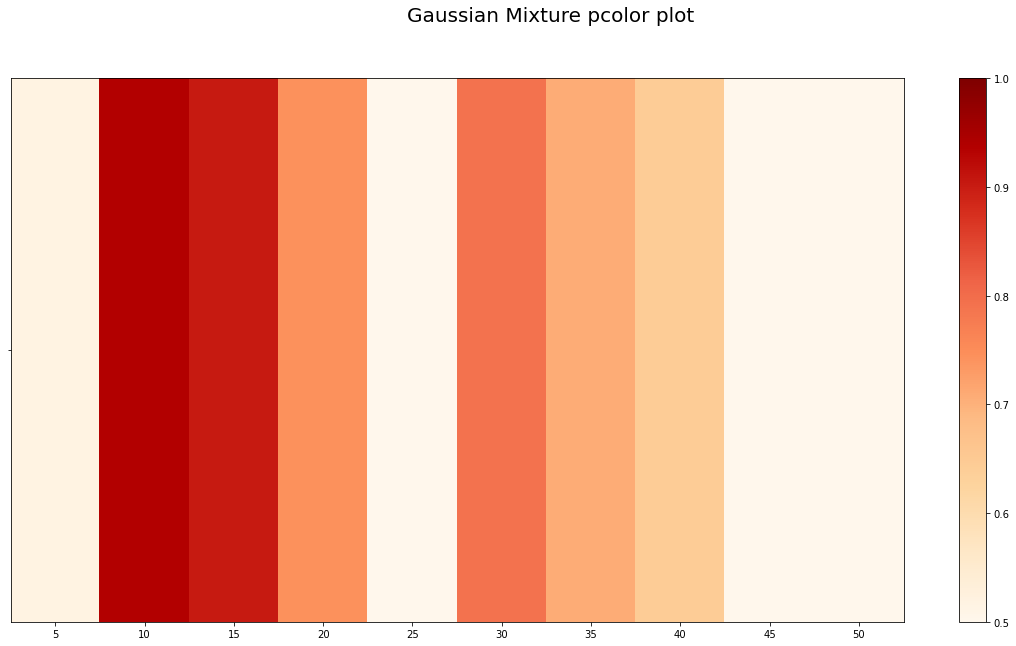

Min Normalized Mutual Information 0.35215439654836755
Max Normalized Mutual Information 0.9376984916890306
Average Normalized Mutual Information 0.6518574877577683
Var Normalized Mutual Information 0.03614653197756494


In [27]:
gaussian_tsne_cityblock_score = generate_tsne_nmi_score_matrix(
    embeddings = embedding_tsne_cityblock,
    cluster = GaussianMixture(n_components =3, 
                              covariance_type =  'full',
                              random_state=42,
                              tol=1e-4))

generate_tsne_pcolor_plot(scores = gaussian_tsne_cityblock_score, 
                          title = "Gaussian Mixture pcolor plot")
report_nmi_matrix_stats(gaussian_tsne_cityblock_score)

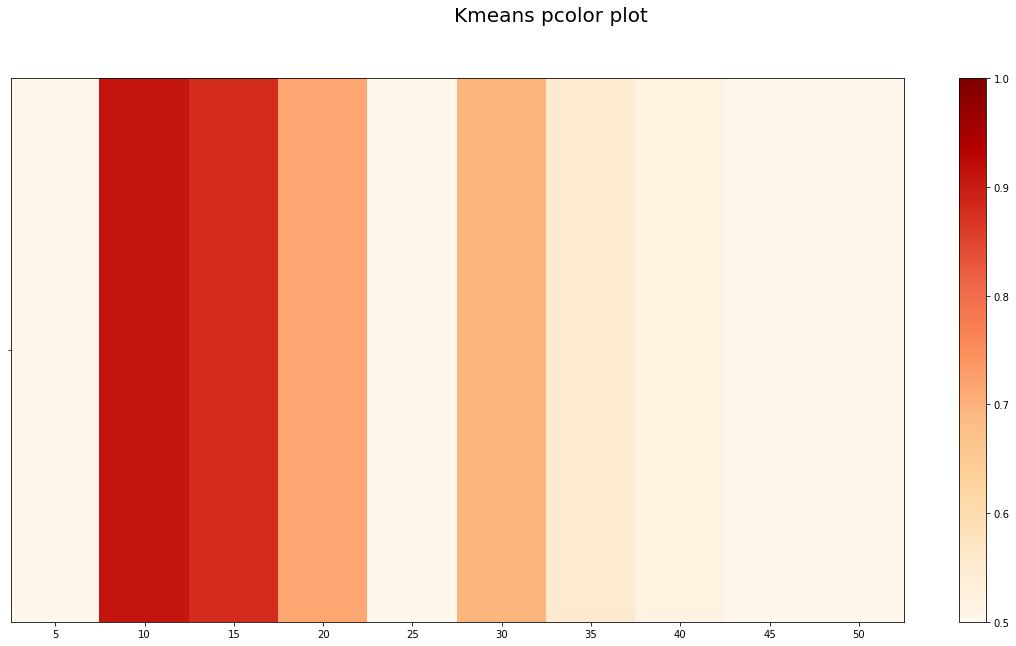

Min Normalized Mutual Information 0.39851730079981584
Max Normalized Mutual Information 0.9086298188600516
Average Normalized Mutual Information 0.594578128810133
Var Normalized Mutual Information 0.03377368134790683


In [28]:
kmeans_tsne_cityblock_score = generate_tsne_nmi_score_matrix(
    embeddings = embedding_tsne_cityblock,
    cluster = KMeans(n_clusters=3, random_state=42, init='k-means++'))

generate_tsne_pcolor_plot(scores = kmeans_tsne_cityblock_score, 
                     title = "Kmeans pcolor plot")
report_nmi_matrix_stats(kmeans_tsne_cityblock_score)

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


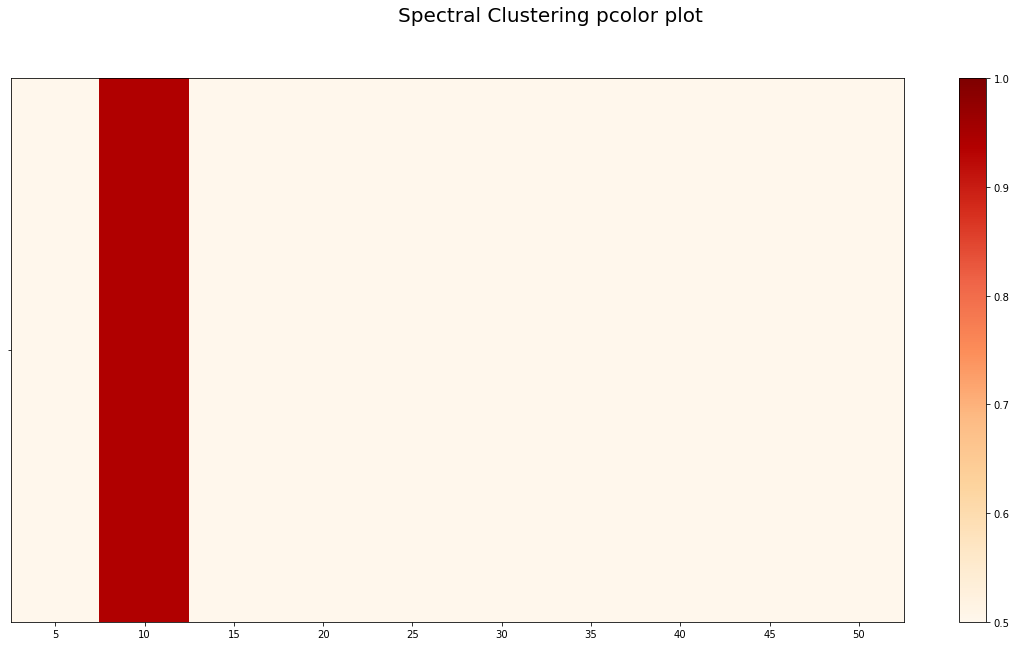

Min Normalized Mutual Information 0.01318125828106154
Max Normalized Mutual Information 0.939770081029861
Average Normalized Mutual Information 0.33625158277307815
Var Normalized Mutual Information 0.05267200565583334


In [29]:
spectral_tsne_cityblock_score = generate_tsne_nmi_score_matrix(
    embeddings = embedding_tsne_cityblock,
    cluster = SpectralClustering(n_clusters=3, 
                                 random_state=42))

generate_tsne_pcolor_plot(scores = spectral_tsne_cityblock_score, 
                          title = "Spectral Clustering pcolor plot")
report_nmi_matrix_stats(spectral_tsne_cityblock_score)

### Pre-2.3.1.2 Generate embedding

After trying with different configurations for TSNE, the optimal settings we can found is as below. Additionally, the Spectral Clustering method yields the best result. We also used different methods, such as “K-Means”, “Agglomerative clustering”, “Birch” and “Gaussian Mixture”.

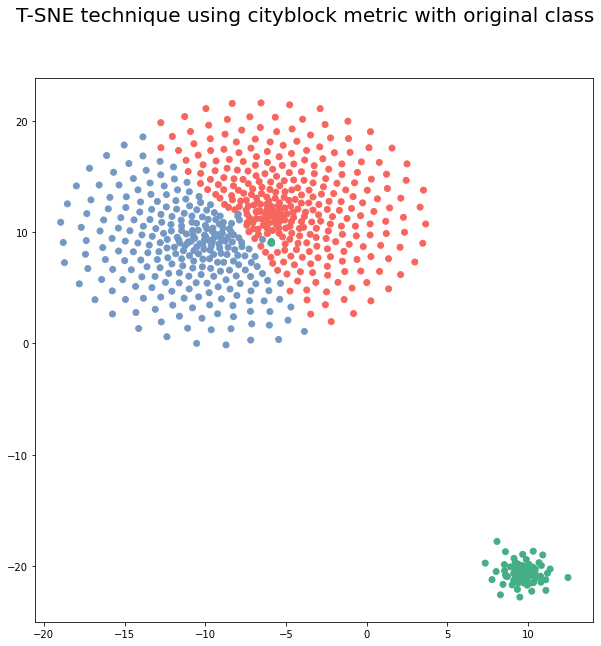

In [8]:
optimal_tsne_cityblock_fit = TSNE(method = 'exact', 
                                  metric = 'cityblock',
                                  perplexity = 10, 
                                  random_state = 42)

optimal_tsne_cityblock_embedding = optimal_tsne_cityblock_fit.fit_transform(df_without_label)

plot_cluster(optimal_tsne_cityblock_embedding[:, 0], 
             optimal_tsne_cityblock_embedding[:, 1], 
             df["class"], 
             'T-SNE technique using cityblock metric with original class')

### 2.3.1.2 Agglomerative clustering method

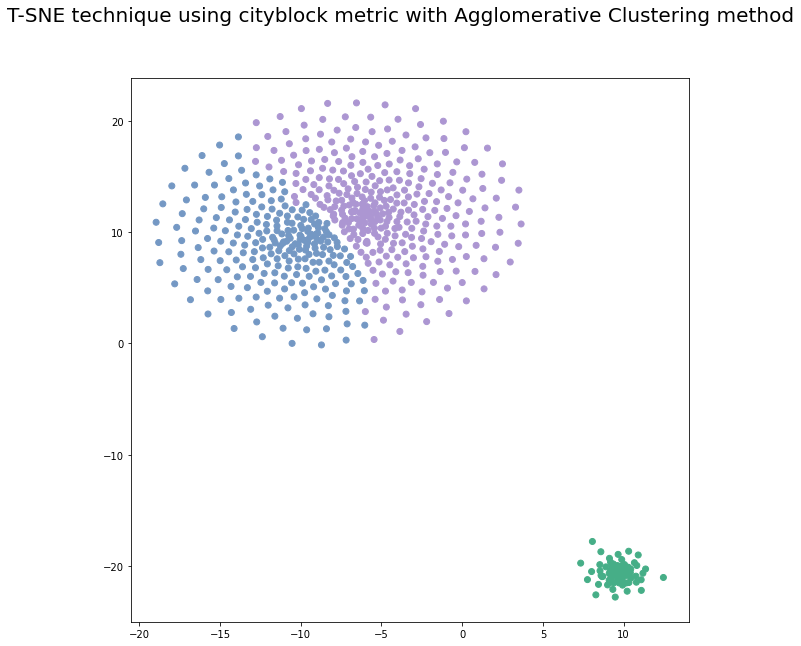

NMI for T-SNE technique using cityblock metric with Agglomerative Clustering method
0.8957683802438461


In [70]:
optimal_tsne_cityblock_agglomerative_labels = AgglomerativeClustering(n_clusters=3, 
                                                                      linkage='ward').fit_predict(optimal_tsne_cityblock_embedding)

plot_cluster(optimal_tsne_cityblock_embedding[:, 0], 
             optimal_tsne_cityblock_embedding[:, 1], 
             optimal_tsne_cityblock_agglomerative_labels, 
             'T-SNE technique using cityblock metric with Agglomerative Clustering method')
print("NMI for T-SNE technique using cityblock metric with Agglomerative Clustering method")
print(calculate_nmi_score(df, optimal_tsne_cityblock_agglomerative_labels))

### 2.3.1.3 Birch method

With Birch method, it is a bit different since TSNE perplexity have to be 15.

In [71]:
optimal_tsne_cityblock_for_birch_fit = TSNE(method = 'exact', 
                                            metric = 'cityblock',
                                            perplexity = 15, 
                                            random_state = 42)

optimal_tsne_cityblock_for_birch_embedding = optimal_tsne_cityblock_for_birch_fit.fit_transform(df_without_label)

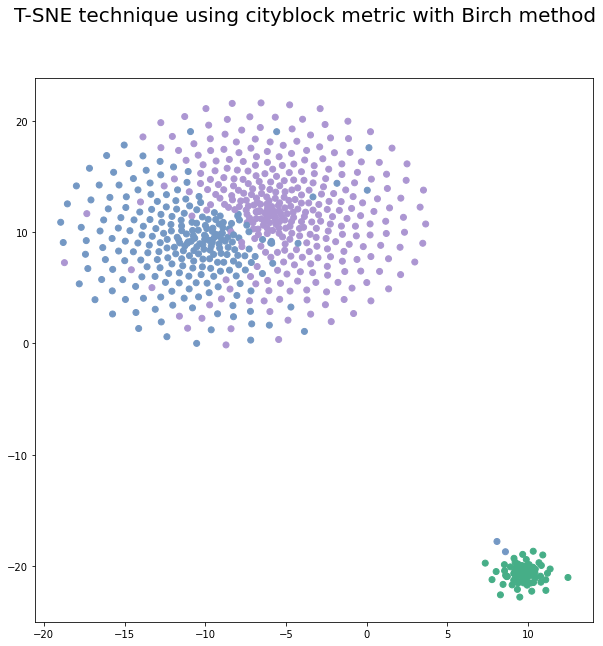

NMI for T-SNE technique using cityblock metric with Birch method
0.7509153568983269


In [72]:
optimal_tsne_cityblock_birch_labels = Birch(n_clusters=3, 
                                            threshold=0.1).fit_predict(optimal_tsne_cityblock_for_birch_embedding)

plot_cluster(optimal_tsne_cityblock_embedding[:, 0], 
             optimal_tsne_cityblock_embedding[:, 1], 
             optimal_tsne_cityblock_birch_labels, 
             'T-SNE technique using cityblock metric with Birch method')
print("NMI for T-SNE technique using cityblock metric with Birch method")
print(calculate_nmi_score(df, optimal_tsne_cityblock_birch_labels))

### 2.3.1.4 Gaussian Mixture method

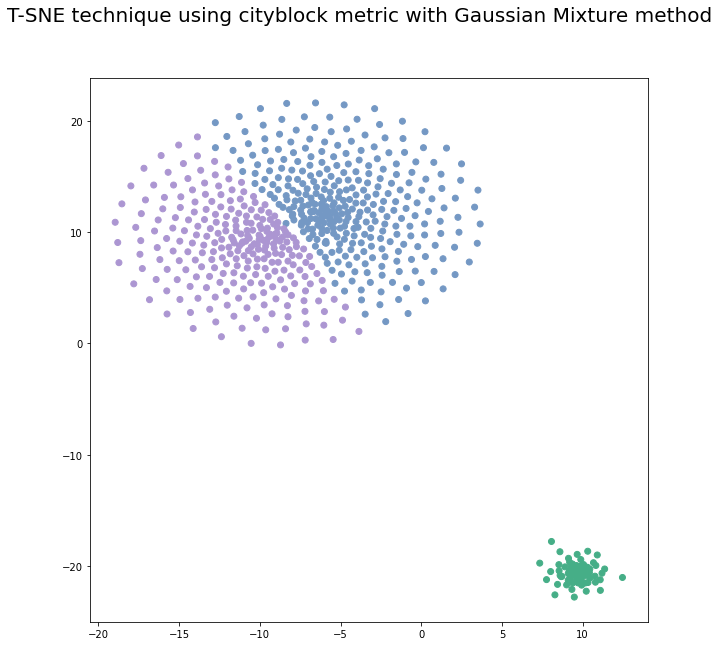

NMI for T-SNE technique using cityblock metric with Gaussian Mixture method
0.9376984916890306


In [73]:
optimal_tsne_cityblock_gaussian_labels = GaussianMixture(n_components =3,
                                                         tol=1e-3).fit_predict(optimal_tsne_cityblock_embedding)

plot_cluster(optimal_tsne_cityblock_embedding[:, 0], 
             optimal_tsne_cityblock_embedding[:, 1], 
             optimal_tsne_cityblock_gaussian_labels, 
             'T-SNE technique using cityblock metric with Gaussian Mixture method')
print("NMI for T-SNE technique using cityblock metric with Gaussian Mixture method")
print(calculate_nmi_score(df, optimal_tsne_cityblock_gaussian_labels))

### 2.3.1.5 K-Means method

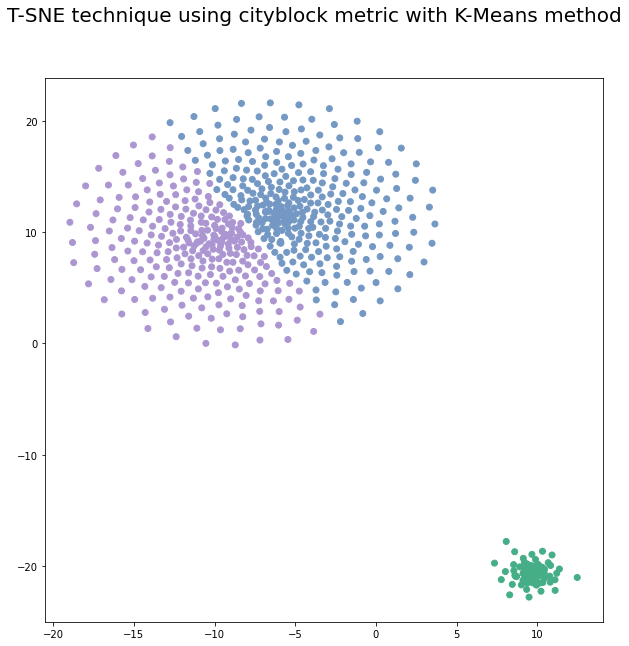

NMI for T-SNE technique using cityblock metric with K-Means method
0.9140856262433763


In [74]:
optimal_tsne_cityblock_k_means_labels = KMeans(n_clusters=3, 
                                               tol=1e-5,
                                               random_state=42, 
                                               init='k-means++').fit_predict(optimal_tsne_cityblock_embedding)

plot_cluster(optimal_tsne_cityblock_embedding[:, 0], 
             optimal_tsne_cityblock_embedding[:, 1], 
             optimal_tsne_cityblock_k_means_labels, 
             'T-SNE technique using cityblock metric with K-Means method')
print("NMI for T-SNE technique using cityblock metric with K-Means method")
print(calculate_nmi_score(df, optimal_tsne_cityblock_k_means_labels))

### 2.3.1.6 Spectral Clustering method

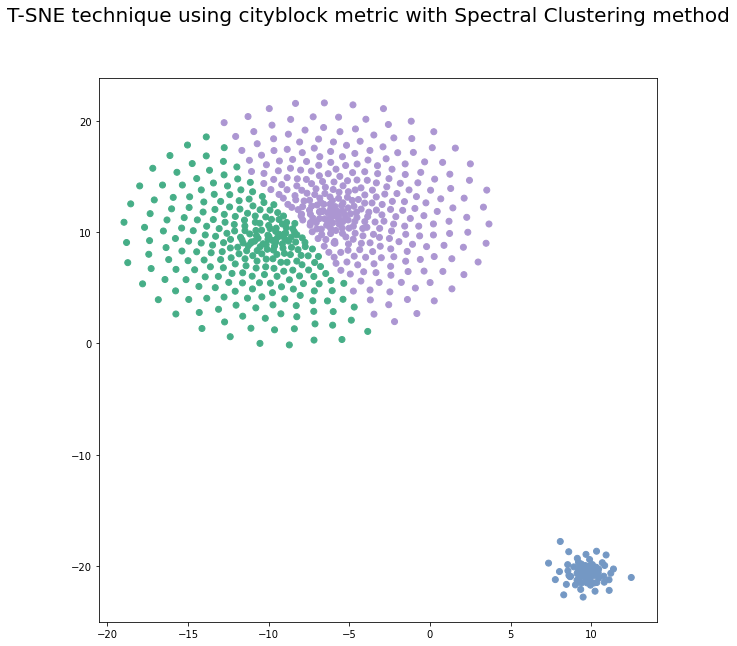

NMI for T-SNE technique using cityblock metric with Spectral Clustering method
0.939770081029861


In [9]:
optimal_tsne_cityblock_spectral_labels = SpectralClustering(n_clusters=3,
                                                            random_state=42).fit_predict(optimal_tsne_cityblock_embedding)

plot_cluster(optimal_tsne_cityblock_embedding[:, 0], 
             optimal_tsne_cityblock_embedding[:, 1], 
             optimal_tsne_cityblock_spectral_labels, 
             'T-SNE technique using cityblock metric with Spectral Clustering method')
print("NMI for T-SNE technique using cityblock metric with Spectral Clustering method")
print(calculate_nmi_score(df, optimal_tsne_cityblock_spectral_labels))

### 2.3.1.7 Comparison

In [77]:
table = Texttable()

table.add_row(['Method','Normalized Mutual Information'])
table.add_row(["Agglomerative clustering", calculate_nmi_score(df, optimal_tsne_cityblock_agglomerative_labels)])
table.add_row(["Birch", calculate_nmi_score(df, optimal_tsne_cityblock_birch_labels)])
table.add_row(["Gaussian Mixture", calculate_nmi_score(df, optimal_tsne_cityblock_gaussian_labels)])
table.add_row(["K-Means", calculate_nmi_score(df, optimal_tsne_cityblock_k_means_labels)])
table.add_row(["Spectral Clustering", calculate_nmi_score(df, optimal_tsne_cityblock_spectral_labels)])

print(table.draw())

+--------------------------+-------------------------------+
| Method                   | Normalized Mutual Information |
+--------------------------+-------------------------------+
| Agglomerative clustering | 0.896                         |
+--------------------------+-------------------------------+
| Birch                    | 0.751                         |
+--------------------------+-------------------------------+
| Gaussian Mixture         | 0.938                         |
+--------------------------+-------------------------------+
| K-Means                  | 0.914                         |
+--------------------------+-------------------------------+
| Spectral Clustering      | 0.940                         |
+--------------------------+-------------------------------+


Export the results to submit to A+

In [49]:
np.savetxt("q2.txt", 
           optimal_tsne_cityblock_spectral_labels, 
           fmt="%s",
           encoding = "utf-8")

### 2.3.2 UMAP Technique

In [9]:
def generate_umap_embedding(df,  
                            dist_range = [round(i* 0.05, 2) for i in range(1, 21)],
                            neighbor_range = [i * 5 for i in range(1, 21)],
                            random_state = 42):
    embedding = []
    
    for dist in dist_range:
        embedding_dist = []
        
        for neighbor in neighbor_range:
            
            fit = umap.UMAP(
                metric = 'canberra',
                min_dist = dist,
                n_neighbors = neighbor,
                random_state = random_state)
            
            embedding_neighbor = fit.fit_transform(df)
            embedding_dist.append(embedding_neighbor)
            
        embedding.append(embedding_dist)

    return embedding

def generate_umap_nmi_score_matrix(embeddings,
                                   cluster):
    score = []
    dist_range = range(0, len(embeddings))
    neighbor_range = range(0, len(embeddings[0]))
    
    for dist in dist_range:
        score_dist = []
        
        for neighbor in neighbor_range:
            
            labels = cluster.fit_predict(embeddings[dist][neighbor])
            score_neighbor = calculate_nmi_score(df, labels)
            score_dist.append(score_neighbor)
        score.append(score_dist)  
    return score

def generate_umap_pcolor_plot(scores,  
                              title,
                              X = [i * 5 for i in range(1, 21)],
                              Y = [round(i* 0.05,2) for i in range(1, 21)]):

    fig,ax = plt.subplots(figsize=(20, 10))
    fig.suptitle(title, fontsize = 20)
    plt.pcolor(scores, cmap=plt.cm.OrRd, vmin = 0.5, vmax = 1)

    ax.set_yticks(np.arange(len(Y))+0.5)
    ax.set_yticklabels(Y)

    ax.set_xticks(np.arange(len(X))+0.5)
    ax.set_xticklabels(X)

    plt.colorbar()
    plt.show()
    
def get_optimal_dist_and_neighbor(scores):
    possition = np.where(scores == np.max(scores))
    return [round((possition[0][0] +1)*0.05 , 2), (possition[1][0] + 1)*5]

### 2.3.2.1 Score matrix 

In [15]:
# This task will be time-consuming. ETC: 70 minutes. Code from section 2.3.2.2 can be run without running this.
embedding_umap_canberra = generate_umap_embedding(df_without_label)

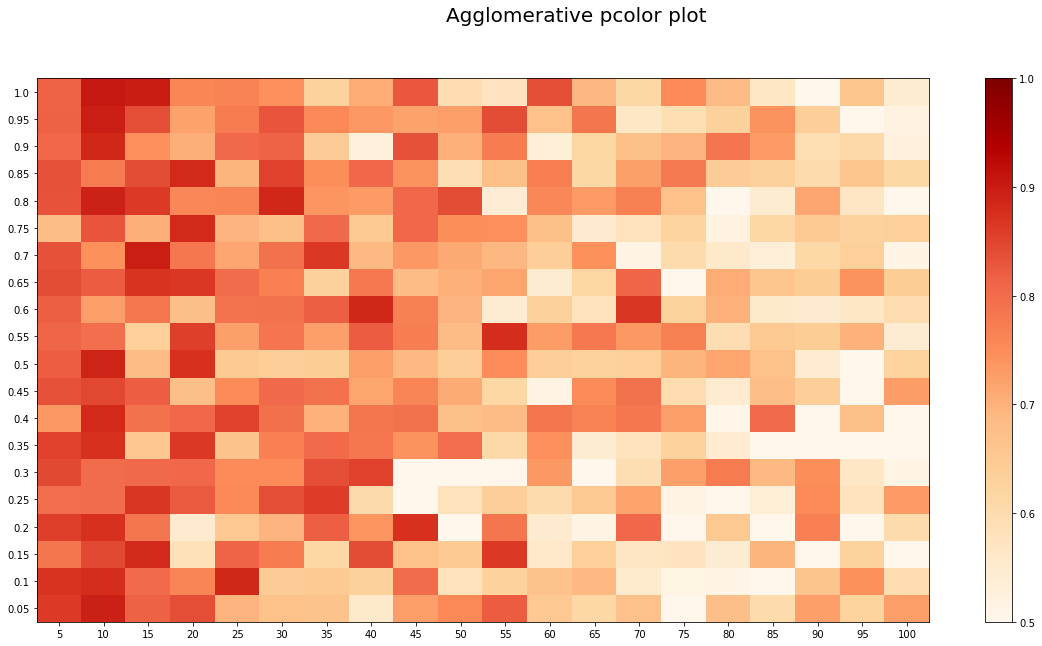

Min Normalized Mutual Information 0.42438034385183226
Max Normalized Mutual Information 0.9053989789915935
Average Normalized Mutual Information 0.6978482768547809
Var Normalized Mutual Information 0.013804550284342505


In [79]:
agglomerative_umap_canberra_score = generate_umap_nmi_score_matrix(
    embeddings = embedding_umap_canberra,
    cluster = AgglomerativeClustering(n_clusters=3, linkage='ward'))

generate_umap_pcolor_plot(scores = agglomerative_umap_canberra_score, 
                          title = "Agglomerative pcolor plot")
report_nmi_matrix_stats(agglomerative_umap_canberra_score)

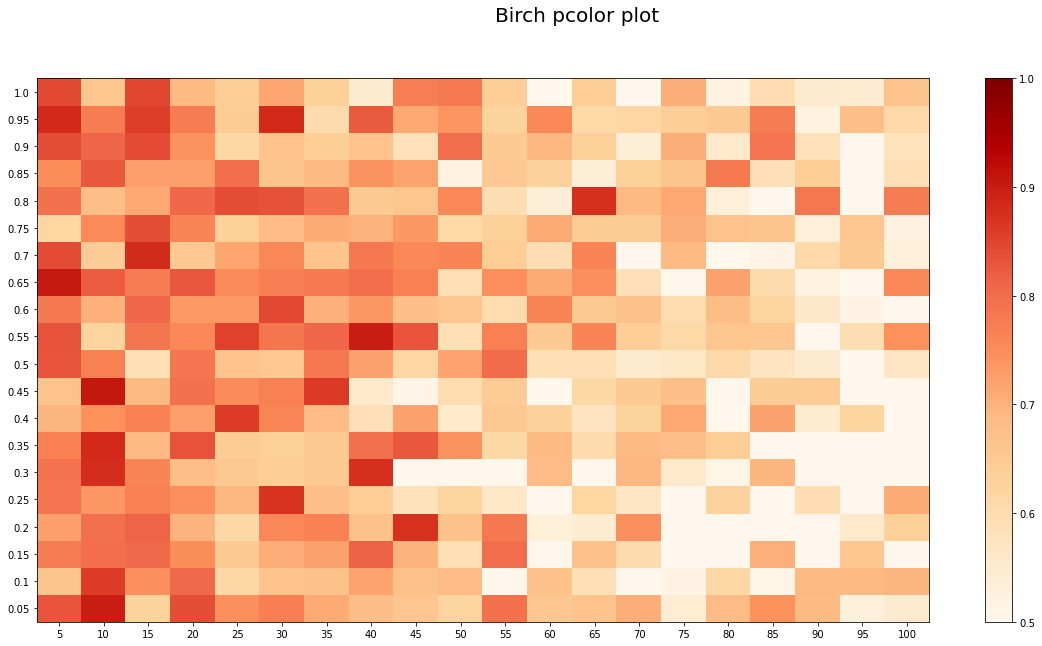

Min Normalized Mutual Information 0.42675929353776065
Max Normalized Mutual Information 0.9072812339700991
Average Normalized Mutual Information 0.6678321464480796
Var Normalized Mutual Information 0.01297964420151549


In [24]:
birch_umap_canberra_score = generate_umap_nmi_score_matrix(
    embeddings = embedding_umap_canberra,
    cluster = Birch(n_clusters=3, threshold=0.1))

generate_umap_pcolor_plot(scores = birch_umap_canberra_score, 
                          title = "Birch pcolor plot")
report_nmi_matrix_stats(birch_umap_canberra_score)

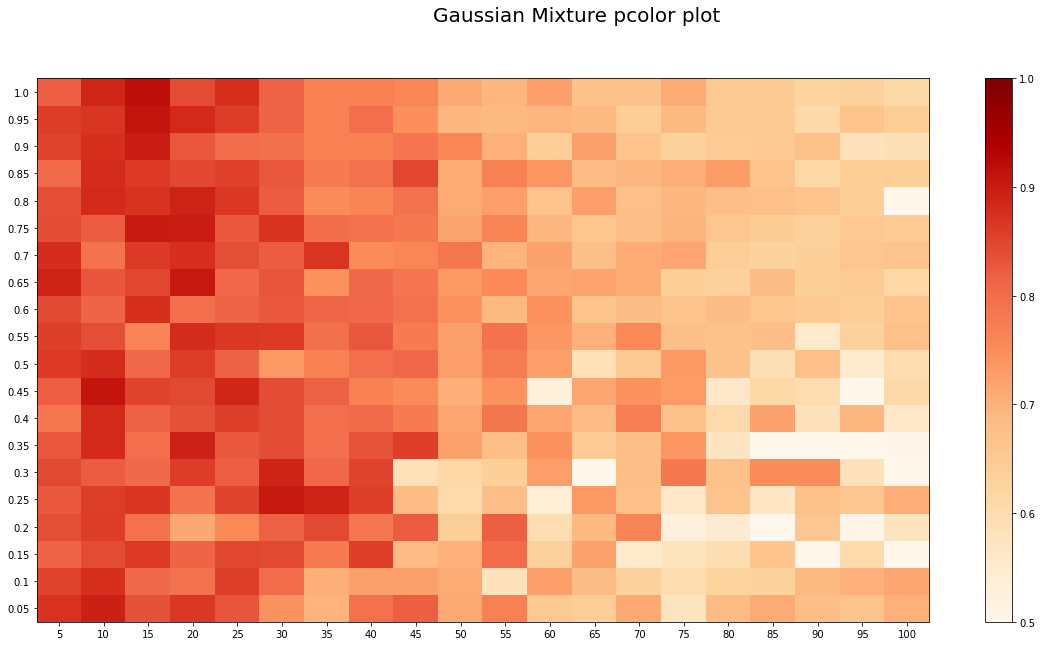

Min Normalized Mutual Information 0.4180144363959055
Max Normalized Mutual Information 0.9181945206604578
Average Normalized Mutual Information 0.7347327546502354
Var Normalized Mutual Information 0.01041480498836342


In [47]:
gaussian_umap_canberra_score = generate_umap_nmi_score_matrix(
    embeddings = embedding_umap_canberra,
    cluster = GaussianMixture(n_components =3, tol=1e-4))

generate_umap_pcolor_plot(scores = gaussian_umap_canberra_score, 
                          title = "Gaussian Mixture pcolor plot")
report_nmi_matrix_stats(gaussian_umap_canberra_score)

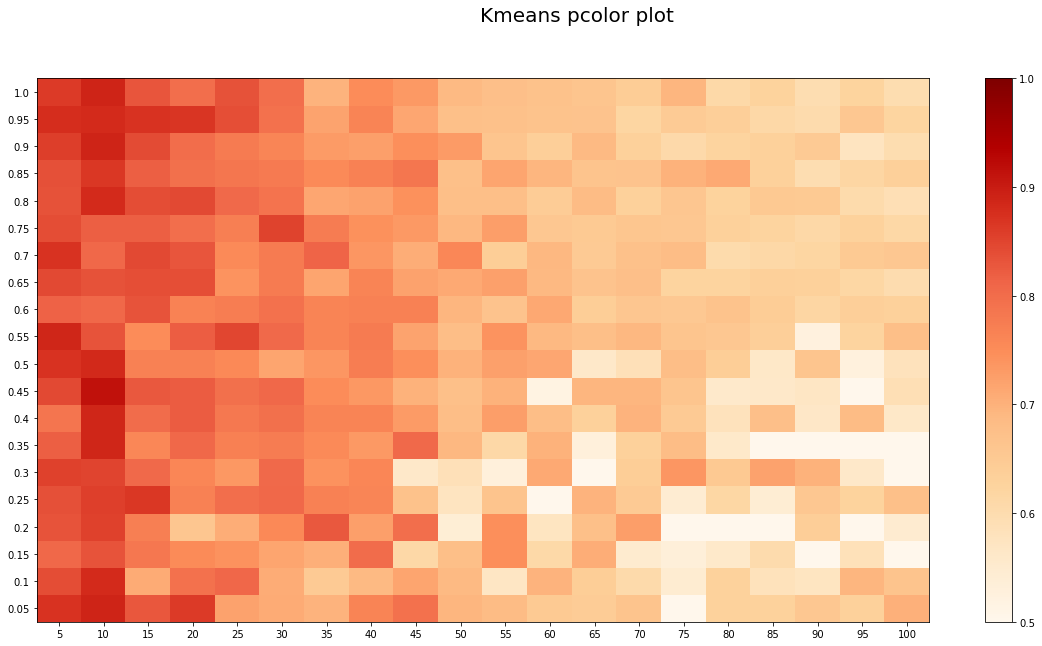

Min Normalized Mutual Information 0.4265218873218711
Max Normalized Mutual Information 0.9145656356332511
Average Normalized Mutual Information 0.7025473671420905
Var Normalized Mutual Information 0.009869046520515387


In [26]:
kmeans_umap_canberra_score = generate_umap_nmi_score_matrix(
    embeddings = embedding_umap_canberra,
    cluster = KMeans(n_clusters=3, random_state=42, init='k-means++'))

generate_umap_pcolor_plot(scores = kmeans_umap_canberra_score, 
                          title = "Kmeans pcolor plot")
report_nmi_matrix_stats(kmeans_umap_canberra_score)

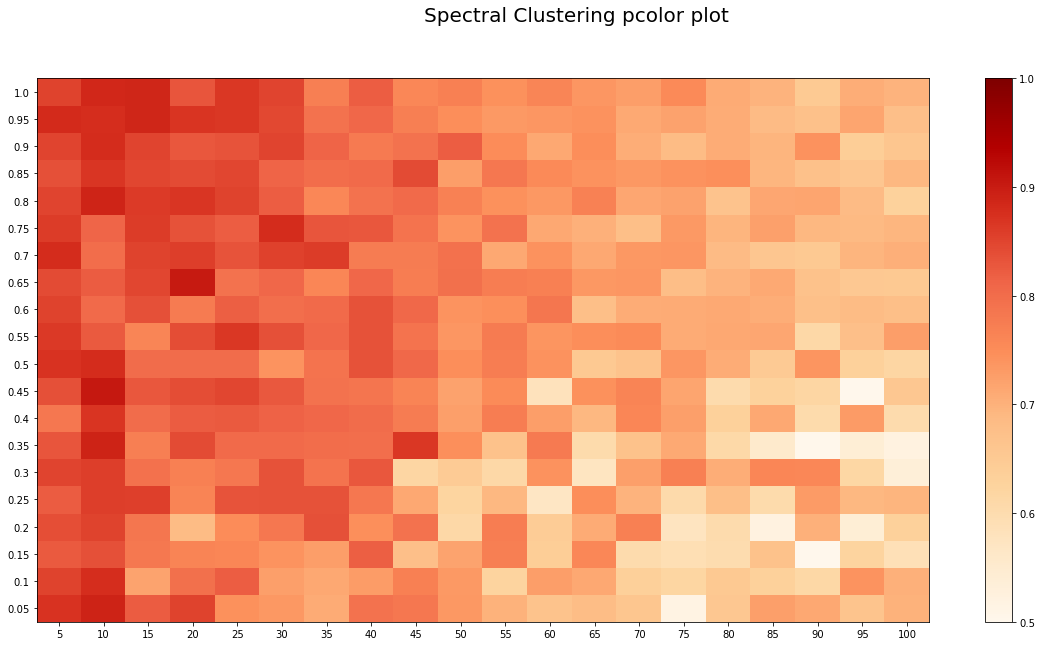

Min Normalized Mutual Information 0.4358812585193598
Max Normalized Mutual Information 0.9045870218674098
Average Normalized Mutual Information 0.7475162347322001
Var Normalized Mutual Information 0.007094259174050044


In [27]:
spectral_umap_canberra_score = generate_umap_nmi_score_matrix(
    embeddings = embedding_umap_canberra,
    cluster = SpectralClustering(n_clusters=3, 
                                 random_state=42))

generate_umap_pcolor_plot(scores = spectral_umap_canberra_score, 
                          title = "Spectral Clustering pcolor plot")
report_nmi_matrix_stats(spectral_umap_canberra_score)

### Pre-2.3.2.2 Generate embedding

Unfortunately, there is no optimal embedding for all clustering methods. Therefore, with different methods, different embeddings will be contructed.

### 2.3.2.2 Agglomerative clustering method

In [50]:
# get_optimal_dist_and_neighbor(agglomerative_umap_canberra_score)
# 1.0, 10

[1.0, 10]

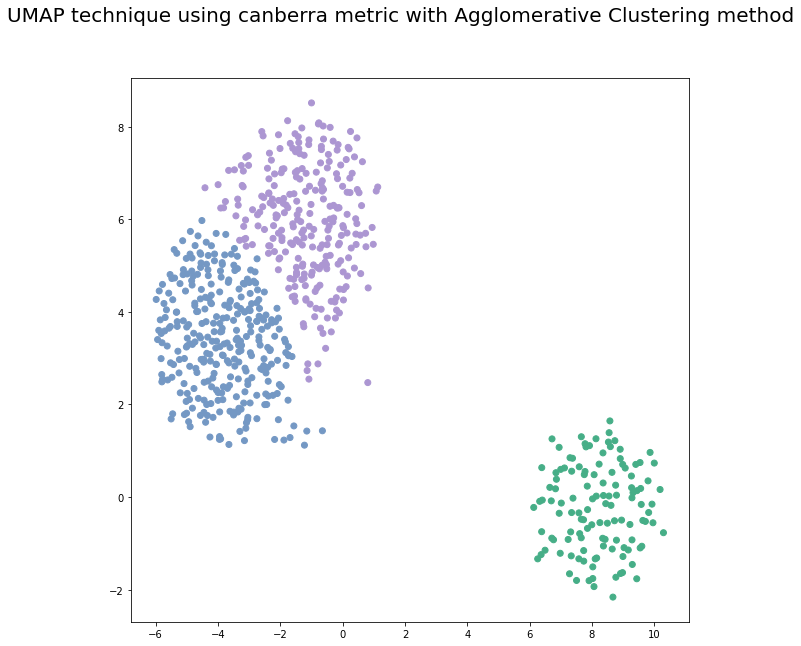

UMAP technique using canberra metric with Agglomerative Clustering method
0.9053989789915935


In [37]:
optimal_umap_canberra_agglomerative_fit = umap.UMAP( metric = 'canberra', 
                                       min_dist = 1, 
                                       n_neighbors = 10, 
                                       random_state = 42)

optimal_umap_canberra_for_agglomerative_embedding = optimal_umap_canberra_agglomerative_fit.fit_transform(df_without_label)


optimal_umap_canberra_agglomerative_labels = AgglomerativeClustering(n_clusters=3, 
                                                                      linkage='ward').fit_predict(optimal_umap_canberra_for_agglomerative_embedding)

plot_cluster(optimal_umap_canberra_for_agglomerative_embedding[:, 0],
             optimal_umap_canberra_for_agglomerative_embedding[:, 1], 
             optimal_umap_canberra_agglomerative_labels, 
             'UMAP technique using canberra metric with Agglomerative Clustering method')
print("UMAP technique using canberra metric with Agglomerative Clustering method")
print(calculate_nmi_score(df, optimal_umap_canberra_agglomerative_labels))

### 2.3.2.3 Birch method

In [42]:
# get_optimal_dist_and_neighbor(birch_umap_canberra_score)
# 0.45, 10

[0.45, 10]

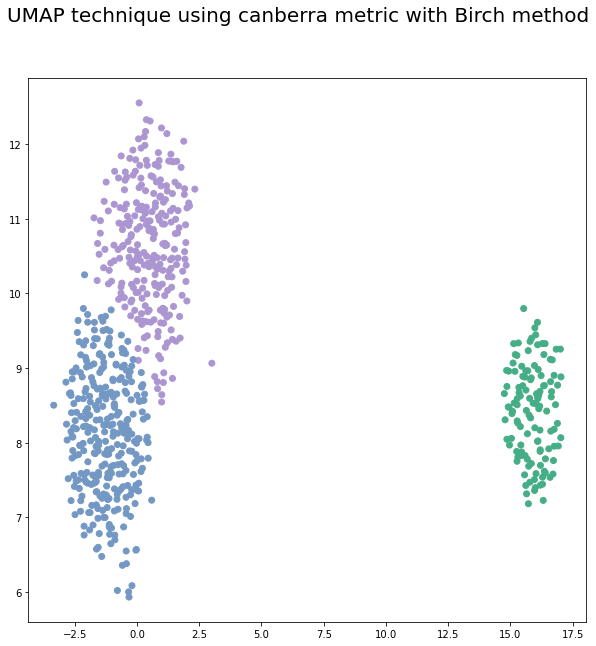

UMAP technique using canberra metric with Birch method
0.9072812339700991


In [11]:
optimal_umap_canberra_birch_fit = umap.UMAP( metric = 'canberra', 
                                       min_dist = 0.45, 
                                       n_neighbors = 10, 
                                       random_state = 42)

optimal_umap_canberra_for_birch_embedding = optimal_umap_canberra_birch_fit.fit_transform(df_without_label)


optimal_umap_canberra_for_birch_labels =  Birch(n_clusters=3, threshold=0.1).fit_predict(optimal_umap_canberra_for_birch_embedding)

plot_cluster(optimal_umap_canberra_for_birch_embedding[:, 0],
             optimal_umap_canberra_for_birch_embedding[:, 1], 
             optimal_umap_canberra_for_birch_labels, 
             'UMAP technique using canberra metric with Birch method')
print("UMAP technique using canberra metric with Birch method")
print(calculate_nmi_score(df, optimal_umap_canberra_for_birch_labels))

### 2.3.2.4 Gaussian Mixture method

In [45]:
# get_optimal_dist_and_neighbor(gaussian_umap_canberra_score)
# 1, 15

[1.0, 15]

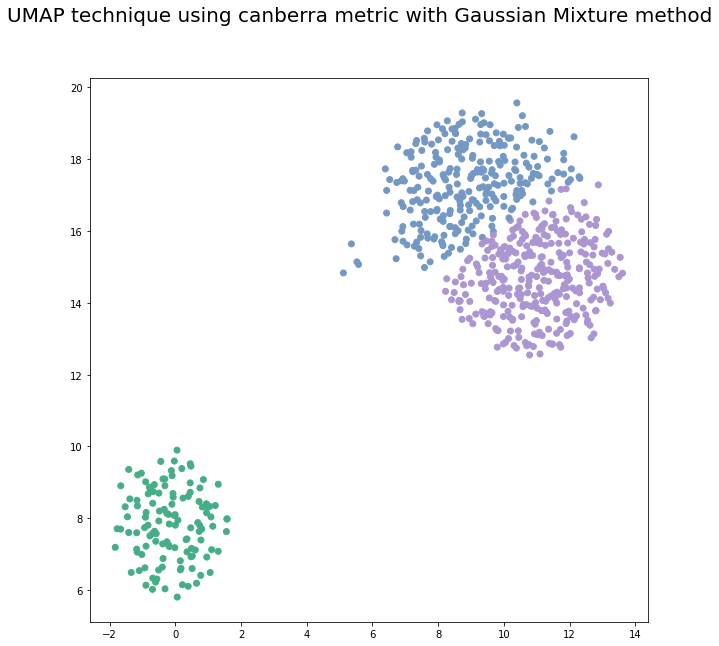

UMAP technique using canberra metric with Gaussian Mixture method
0.9181945206604578


In [10]:
optimal_umap_canberra_gaussian_fit = umap.UMAP( metric = 'canberra', 
                                       min_dist = 1, 
                                       n_neighbors = 15, 
                                       random_state = 42)

optimal_umap_canberra_for_gaussian_embedding = optimal_umap_canberra_gaussian_fit.fit_transform(df_without_label)


optimal_umap_canberra_for_gaussian_labels =  GaussianMixture(n_components =3, 
                                                             tol=1e-4,
                                                             random_state = 42).fit_predict(optimal_umap_canberra_for_gaussian_embedding)

plot_cluster(optimal_umap_canberra_for_gaussian_embedding[:, 0],
             optimal_umap_canberra_for_gaussian_embedding[:, 1], 
             optimal_umap_canberra_for_gaussian_labels, 
             'UMAP technique using canberra metric with Gaussian Mixture method')
print("UMAP technique using canberra metric with Gaussian Mixture method")
print(calculate_nmi_score(df, optimal_umap_canberra_for_gaussian_labels))

Since Gaussian Mixture has the best results, we can compare it with original class.

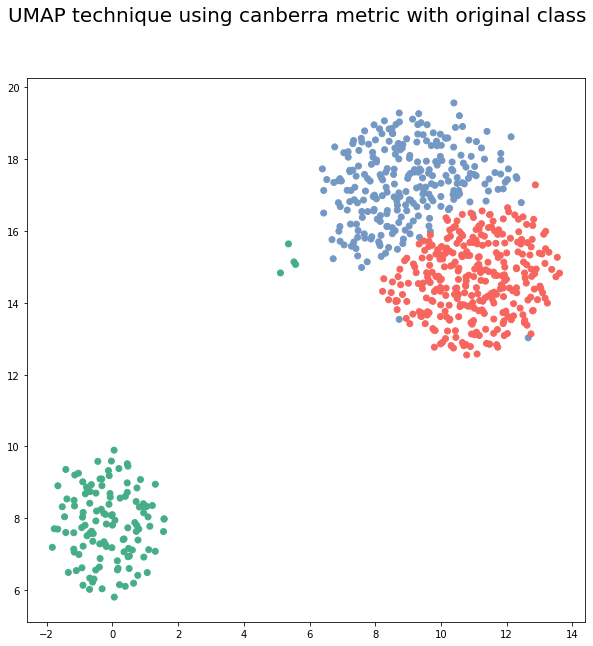

In [39]:
plot_cluster(optimal_umap_canberra_for_gaussian_embedding[:, 0],
             optimal_umap_canberra_for_gaussian_embedding[:, 1], 
             df["class"], 
             'UMAP technique using canberra metric with original class')

### 2.3.2.5 K-Means method

In [53]:
# get_optimal_dist_and_neighbor(kmeans_umap_canberra_score)
# 0.45, 10

[0.45, 10]

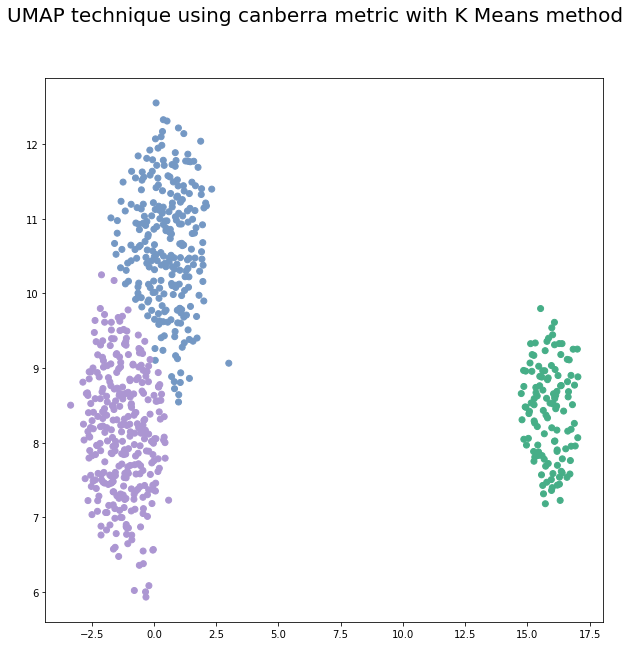

UMAP technique using canberra metric with K Means method
0.9145656356332512


In [13]:
optimal_umap_canberra_k_means_fit = umap.UMAP( metric = 'canberra', 
                                       min_dist = 0.45, 
                                       n_neighbors = 10, 
                                       random_state = 42)

optimal_umap_canberra_for_k_means_embedding = optimal_umap_canberra_k_means_fit.fit_transform(df_without_label)


optimal_umap_canberra_for_k_means_labels =  KMeans(n_clusters=3, random_state=42, init='k-means++').fit_predict(optimal_umap_canberra_for_k_means_embedding)

plot_cluster(optimal_umap_canberra_for_k_means_embedding[:, 0],
             optimal_umap_canberra_for_k_means_embedding[:, 1], 
             optimal_umap_canberra_for_k_means_labels, 
             'UMAP technique using canberra metric with K Means method')
print("UMAP technique using canberra metric with K Means method")
print(calculate_nmi_score(df, optimal_umap_canberra_for_k_means_labels))

### 2.3.2.6 Spectral Clustering method

In [57]:
# get_optimal_dist_and_neighbor(spectral_umap_canberra_score)
# 0.45, 10

[0.45, 10]

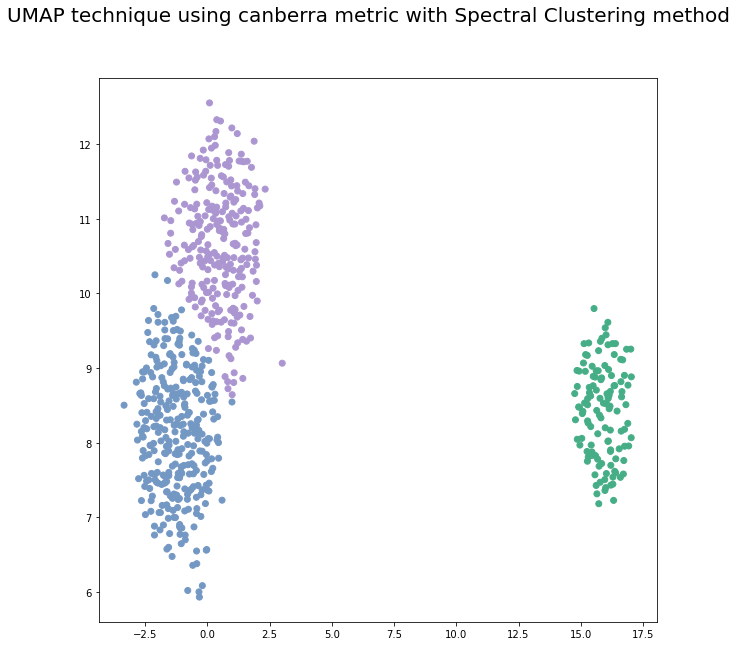

UMAP technique using canberra metric with Spectral Clustering method
0.9045870218674098


In [14]:
optimal_umap_canberra_spectral_fit = umap.UMAP( metric = 'canberra', 
                                       min_dist = 0.45, 
                                       n_neighbors = 10, 
                                       random_state = 42)

optimal_umap_canberra_for_spectral_embedding = optimal_umap_canberra_spectral_fit.fit_transform(df_without_label)


optimal_umap_canberra_for_spectral_labels = SpectralClustering(n_clusters=3, 
                                 random_state=42).fit_predict(optimal_umap_canberra_for_spectral_embedding)

plot_cluster(optimal_umap_canberra_for_spectral_embedding[:, 0],
             optimal_umap_canberra_for_spectral_embedding[:, 1], 
             optimal_umap_canberra_for_spectral_labels, 
             'UMAP technique using canberra metric with Spectral Clustering method')
print("UMAP technique using canberra metric with Spectral Clustering method")
print(calculate_nmi_score(df, optimal_umap_canberra_for_spectral_labels))

### 2.3.2.7 Comparison

In [80]:
table = Texttable()

table.add_row(['Method','Normalized Mutual Information'])
table.add_row(["Agglomerative clustering", calculate_nmi_score(df, optimal_umap_canberra_agglomerative_labels)])
table.add_row(["Birch", calculate_nmi_score(df, optimal_umap_canberra_for_birch_labels)])
table.add_row(["Gaussian Mixture", calculate_nmi_score(df, optimal_umap_canberra_for_gaussian_labels)])
table.add_row(["K-Means", calculate_nmi_score(df, optimal_umap_canberra_for_k_means_labels)])
table.add_row(["Spectral Clustering", calculate_nmi_score(df, optimal_umap_canberra_for_spectral_labels)])

print(table.draw())

+--------------------------+-------------------------------+
| Method                   | Normalized Mutual Information |
+--------------------------+-------------------------------+
| Agglomerative clustering | 0.905                         |
+--------------------------+-------------------------------+
| Birch                    | 0.907                         |
+--------------------------+-------------------------------+
| Gaussian Mixture         | 0.918                         |
+--------------------------+-------------------------------+
| K-Means                  | 0.915                         |
+--------------------------+-------------------------------+
| Spectral Clustering      | 0.905                         |
+--------------------------+-------------------------------+
